# Diagramas T-S (Temperatura Salinidad)

En Oceanografía es común relacionar dos párametros registrados de manera simultánea. Helland-Hansen en 1918 (citado por Thompson y Emery, 2014) fue el primero en sugerir la utilidad de un diagrama donde se graficara la temperatura (T) en contra de la salinidad (S); encontró que los diagramas TS eran similares en grandes áreas del océano y en muchos lugares, permanecían constantes en el tiempo.

Como originalmente fueron concebidos, los diagramas característicos como los diagramas TS son fáciles de realizar. Las curvas *TS exhiben una relación única entre la temperatura, salinidad y profundidad*. La curva tradicional TS es una parte de la familia de curvas que relacionan variables medidas in situ, como la temperatura, salinidad y densidad (\$\sigma_t$) o anomalías termoestéricas (\\(\Delta_{S,T}\\)). La curvatura de esas líneas es ocasionada por el comportamiento nolineal de la ecuación de estado del océano. En un lance de CTD, el diagrama TS, muestra la estabilidad de la columna de agua y por ello puede evaluarse de manera sencilla. A menos que sean en regiones inestables, la densidad deberá incrementarse con la profundidad sobre la curva TS. El análisis de las curvas TS puede vislumbrar importantes procesos de mezclado y advección.

Las dos principales razones por las cuales los diagramas TS son considerados como una poderosa herramienta, para identificar y seguir las masas de agua, son: 1) la temperatura y salinidad son fáciles de medir y 2) en el momento que el agua deja de estar en contacto con la atmósfera, el mezclado del agua cambiará según la temperatura y salinidad. Por esta última razón, <i>T</i> y <i>S</i> se consideran como **propiedades conservativas**.

En los diagramas TS, los contornos representan líneas de igual densidad y sus valores son los de (\$\sigma_t$). Estos valores de expresan la densidad de una muestra (o registro) de agua de mar a presión atmosférica, que es determinada a partir de su temperatura que fue medida in-situ y su salinidad. En algunas ocasiones, \\(\sigma_t\\) se denomina como densidad anómala.

Referencias:<br>
Thompson, R y Emery, W. 2014. <i>Data analysis methods in Physical Oceanography</i>. Elservier. Amsterdam. 729 p.<br>
Open University. 2004. <i>Seawater: its composition, properties and behavior</i>. Butterworth-Heinemann. Singapure. 173 p.<br>

Gabriel Ruiz

## Creación de un diagrama TS

A continuación vamos a generar un diagrama TS con datos "in-situ" del Puerto de Manzanillo, obtenidos en el mes de octubre del 2021, por el Dr. Rubén Morales y Gabriel Ruiz (fig. 1). La temperatura, salinidad y densidad fueron registrados por un CTD CastAway, Sontek. Este pequeño dispositivo puede obtener perfiles hasta una profundidad de 100 m. LA precisión de la salinidad y temperatura es de 0.1 PSU y 0.05 °C, respectivamente; su frecuencia de muestreo es de 5 Hz y posee un sensor de GPS, así como puede conectarse de manera inalámbrica a otros dispositivos. Posee una pantalla que permite visualizar en tiempo real los datos recolectados. Una de las características del dispositivo es que los datos registrados se exportan a un archivo *.mat (archivo de datos para Matlab).

<img src="IMG_1618.JPG" width=300 height=300 /> <br> Figura 1. El Dr. Morales haciendo descender el **CTD CastAway** en el Puerto de Manzanillo, Col.

El primer paso a realizar es cargar los módulos de Python que requerímos:

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import gsw
import simplekml

Vamos a cargar los datos almacenados en el archivo mat en Python.

In [2]:
inputfile = 'CC1739001_20211019_143447.mat'
datos = sio.loadmat(inputfile)

Recuerda identificar el tipo de variable o en su caso el objeto donde se almacenaron los datos. En este caso SciPy, almacena los datos de un archivo mat en un diccionario. A continuación vamos a guardar en variables los parámetros que nos interesan, que son la temperatura (T) y la salinidad (S).

In [3]:
temp = datos['Temperature']
sali = datos['Salinity']
z = datos['Depth']
lat = datos['LatitudeStart']
lon = datos['LongitudeStart']

Para establecer los rangos en los cuales vamos a graficar los valores de T y S, calculemos los valores máximos y mínimos de cada párametro.

In [4]:
prescS = 1./100
prescT = 1./10

smin = sali.min() - (prescS * sali.min())
smax = sali.max() + (prescS * sali.max())

tmin = temp.min() - (prescT * temp.max())
tmax = temp.max() + (prescT * temp.max())

Obteniendo el número de nodos que requieren para representar el rango de cada parámetro:

In [5]:
snodes = int(round((smax-smin)/0.1 + 1, 0))
tnodes = int(round((tmax-tmin) + 1, 0))

Dimensionando la variable donde vamos a calcular la densidad absoluta:

In [6]:
rhoabs = np.zeros((tnodes, snodes))

Construyendo los vectores a partir de cual vamos crear la matriz con los valores de la densidad absoluta:

In [7]:
tem = np.linspace(1, tnodes-1, tnodes) + tmin
sal = np.linspace(1, snodes-1, snodes)*0.1 + smin

Utilizando el módulo de <i>gsw</i> vamos a calcular la densidad anómala con la salinidad, temperatura y la presión:

In [8]:
for j in range(0, int(tnodes)):
    for i in range(0, int(snodes)):
        rhoabs[j, i] = gsw.rho(sal[i], tem[j], 0)

Obteniendo el parámetro \\(\sigma_t\\):

In [9]:
rhoabs = rhoabs - 1000

Graficando la Salinidad y Temperatura vs Profundidad:

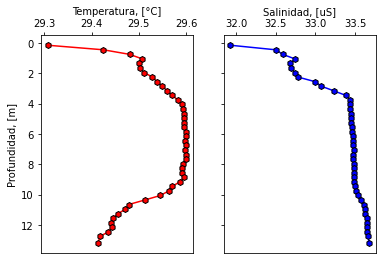

In [10]:
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(temp, z, '-r', marker='h', markerfacecolor='red', markeredgecolor='k')
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_ylabel('Profundidad, [m]')
ax1.set_xlabel('Temperatura, [°C]')
ax1.xaxis.set_label_position('top') 
ax1.xaxis.set_ticks_position('top') 

ax2.plot(sali, z, '-b', marker='h', markerfacecolor='blue', markeredgecolor='k')
ax2.set_xlabel('Salinidad, [uS]')
ax2.xaxis.set_label_position('top') 
ax2.xaxis.set_ticks_position('top') 
ax2.yaxis.set_visible(True) 
#plt.show()
plt.savefig('TvDSvD.png')

Graficando el diagrama TS:

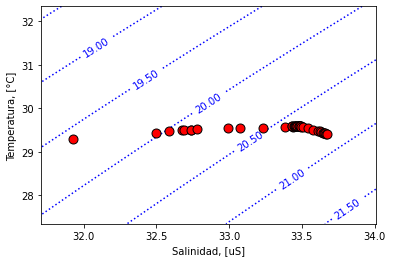

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
hc = plt.contour(sal, tem, rhoabs, linestyles=':', colors='b')
plt.clabel(hc, fontsize=10, inline=1, fmt='%1.2f')
  
ax1.plot(sali, temp, linestyle='None', marker='o', color='r', markersize=9, markeredgecolor='k')
  
ax1.set_xlabel('Salinidad, [uS]')
ax1.set_ylabel('Temperatura, [°C]')
#plt.show()
plt.savefig('diaTS.png')

Exportando los ubicación del perfil a un archivo *.kml de Google Earth...

In [12]:
kmlfile = simplekml.Kml()
kmlfile.newpoint(name='PuntoCTD', coords=[(float(lon), float(lat))])
kmlfile.save('PuntoCTD.kml')